In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readSignal(file):
    signal = np.fromfile(file, sep=' ')
    signal = signal.reshape(-1, 2)
    signal = signal * np.array([1, 1j])
    signal = np.sum(signal, axis=1)
    return signal

In [3]:
signal = readSignal('./txt/signal1.txt')
spectrum = np.fft.fft(signal)

cpp_spectrum_fast = readSignal('./txt/spectrum_fast.txt')
cpp_spectrum_slow = readSignal('./txt/spectrum_slow.txt')

print(f"mse of cpp_spectrum_fast and spectrum: {(np.square(cpp_spectrum_fast - spectrum)).mean()}")
print(f"mse of cpp_spectrum_slow and spectrum: {(np.square(cpp_spectrum_slow - spectrum)).mean()}")

complex128
mse of cpp_spectrum_fast and spectrum: (-3.3074935381067407e-18+1.934576929414519e-18j)
mse of cpp_spectrum_slow and spectrum: (-3.3074935381067407e-18+1.934576929414519e-18j)


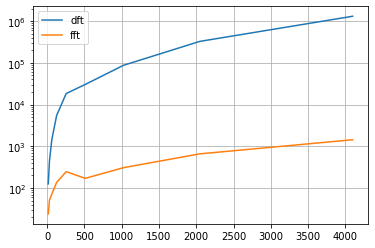

In [13]:
x = np.array([16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
dft = np.array([126, 447, 1462, 5466, 18391, 30430, 87401, 327235, 1310339])
fft = np.array([24, 51, 72, 136, 247, 171, 308, 660, 1438])

plt.grid()
plt.yscale('log')
plt.plot(x, dft)
plt.plot(x, fft)
plt.legend(['dft', 'fft'])

In [12]:
signal1 = readSignal('./txt/signal1.txt')
signal2 = readSignal('./txt/signal2.txt')

cpp_conv_fast = readSignal('./txt/convolution_fast.txt')
cpp_conv_slow = readSignal('./txt/convolution_slow.txt')

conv = np.convolve(signal1, signal2)

print(f"mse of cpp_conv_fast and cpp_conv_slow: {(np.square(cpp_conv_fast - cpp_conv_slow)).mean()}")
print(f"mse of cpp_conv_fast and conv: {(np.square(cpp_conv_fast - conv)).mean()}")
print(f"mse of cpp_conv_slow and conv: {(np.square(cpp_conv_slow - conv)).mean()}")

mse of cpp_conv_fast and cpp_conv_slow: (2.5566000805081684e-10-6.396822178684828e-11j)
mse of cpp_conv_fast and conv: (3.299698489698322e-10-5.979241454052225e-11j)
mse of cpp_conv_slow and conv: (1.4948043173128423e-11+5.181460479686944e-15j)


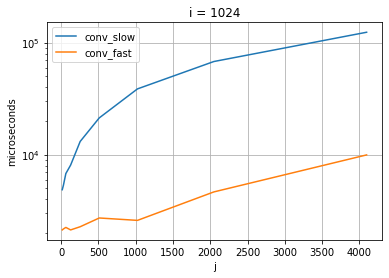

In [17]:
j = np.array([16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
conv_slow = np.array([4875, 5360, 6795, 8082, 13134, 21325, 38692, 67901, 123923])
conv_fast = np.array([2135, 2178, 2246, 2134, 2278, 2727, 2596, 4659, 9967])

plt.title('i = 1024')
plt.xlabel('j')
plt.ylabel('microseconds')
plt.grid()
plt.yscale('log')
plt.plot(j, conv_slow)
plt.plot(j, conv_fast)
plt.legend(['conv_slow', 'conv_fast'])

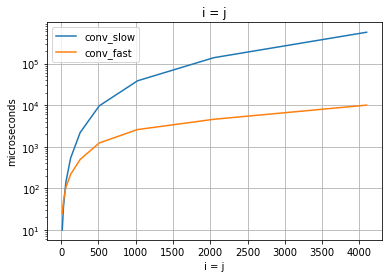

In [18]:
j = np.array([16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
conv_slow = np.array([10, 36, 140, 535, 2205, 9683, 38692, 139445, 570937])
conv_fast = np.array([25, 50, 105, 217, 496, 1239, 2596, 4594, 10065]

plt.title('i = j')
plt.xlabel('i = j')
plt.ylabel('microseconds')
plt.grid()
plt.yscale('log')
plt.plot(j, conv_slow)
plt.plot(j, conv_fast)
plt.legend(['conv_slow', 'conv_fast'])